In [309]:
# foto splitsen in 4 van 32x32
# 

from SimpleCV import *
from IPython.display import HTML
import matplotlib as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2
import glob

In [310]:
disp = Display(displaytype='notebook')
size = 32

imagelist = []

# get all files and add them to tuple with the postal codes
for filename in glob.glob("../dataset-images/*.png"): 
    image = Image(filename)
    image = image.binarize().dilate()
    answer = filename[18:22]
    imagelist.append((answer, image))
    
numbers = []

# seperate individual number images with the number
for image in imagelist:
    for i in range(4):
        digit = image[0][(0 if i+1 == 1 else i):i+1]
        numbers.append((digit, image[1].crop(i*size, 0, size, size*(i+1) )))

In [326]:
# divide number images into pieces of 4x4 and create matrix
def createMatrix(image):
    size = 8
    m = np.zeros((4,4))

    pieces = []
    for y in range(4):
        for x in range(4):
            crop = image.crop(x*size, y*size, size, size)
            pieces.append(crop)
            m[x][y] = 1 if crop.meanColor()[0] > 80 else 0

    return m.T

In [363]:
def getBlobInfo(image):
    info = {}
    blobs = image.findBlobs()
    image.draw(blobs, autocolor=True)
    blob = blobs[0]
#     add area to dict
    info["area"] = (blob.area())
#     add centroid to dict
    x, y = blob.centroid()
    info["centroid_x"] = x
    info["centroid_y"] = y
    info["angle"] = blob.angle()
    return info

In [366]:
numbersDict = []

for number in numbers:
    image = number[1]
    blob = getBlobInfo(image)
    numDict = {
        "matrix": createMatrix(image),
        "blob_area" : blob["area"],
        "blob_centroid_x" : blob["centroid_x"],
        "blob_centroid_y" : blob["centroid_y"],
        "blob_angle" : blob["angle"],
        "label" : number[0]
    }
    numbersDict.append(numDict)

    print numDict["blob_angle"]

    
#     print number[0]
#     num = number[1]
#     num.save(disp)
    


90.0
90.0
-79.6951522827
90.0
81.8698978424
-63.4349517822
90.0
90.0
90.0
83.6598086357
78.6900672913
85.0302591324
90.0
90.0
90.0
86.6335396767
90.0
-60.9453964233
87.614055872
90.0
90.0
90.0
90.0
82.2348337173
90.0
-60.9453964233
90.0
-61.6992454529
90.0
90.0
90.0
90.0
90.0
-77.9052429199
-60.6422462463
90.0
90.0
90.0
-83.9909896851
90.0
68.6293792725
80.1341924667
90.0
90.0
90.0
-59.9314193726
81.5730314255
-85.0302581787
85.9143834114
-63.4349517822
87.3974378109
-86.8201675415
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
-79.2156982422
90.0
90.0
87.7974019051
90.0
83.6598086357
83.9909939766
90.0
90.0
90.0
90.0
90.0
90.0
-66.8014068604
-87.1375961304
90.0
83.9909939766
90.0
90.0
90.0
79.2157020569
90.0
90.0
90.0
-56.309928894
90.0
90.0
90.0
90.0
90.0
-57.9946174622
90.0
81.4692344666
90.0
84.8055710793
90.0
90.0
83.6598086357
90.0
83.6598086357
90.0
90.0
-87.3974456787
90.0
90.0
90.0
90.0
82.8749833107
90.0
-69.4439544678
90.0
90.0
87.5104470253
90.0
90.0
90.0
90.0
82.8749833107
9

-78.2317123413
90.0
-68.74949646
90.0
90.0
90.0
90.0
83.6598081589
90.0
90.0
-59.7435646057
90.0
90.0
90.0
90.0
87.5104472637
83.6598086357
86.9872126579
90.0
90.0
90.0
-87.5104446411
90.0
-82.8749847412
90.0
90.0
90.0
90.0
90.0
90.0
-87.7093887329
90.0
90.0
90.0
87.2736887932
86.6335391998
-59.036239624
-58.2405204773
-79.6951522827
90.0
90.0
90.0
90.0
70.7099571228
-59.036239624
90.0
-71.5650482178
66.5014343262
-63.4349517822
90.0
90.0
79.6951541901
81.0273742676
87.3974378109
81.0273733139
90.0
90.0
87.1375949383
90.0
-87.7093887329
90.0
86.8201699257
90.0
90.0
90.0
84.5596680641
90.0
-59.036239624
90.0
90.0
85.0302591324
80.5376787186
90.0
90.0
-87.3974456787
86.6335394382
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
-63.4349517822
-57.9946174622
90.0
90.0
90.0
90.0
90.0
90.0
85.0302591324
90.0
-60.6422462463
90.0
90.0
90.0
-65.5560455322
90.0
90.0
-74.0546035767
87.614055872
84.2894077301
90.0
90.0
90.0
90.0
79.6951532364
-56.309928894
90.0
90.0
90.0
90.0
90.0
-87.61405

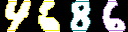

[ 363.5  380.5  423.5  502.5]


In [308]:
# TEST : 4686: too many blobs

testImage = Image("../dataset-images/4686.png")
testImage = testImage.binarize().dilate()
blobs = testImage.findBlobs()
testImage.draw(blobs, autocolor=True)
testImage.save(disp)
print blobs.area()

testNums = []

for i in range(4):
    testNums.append(testImage.crop(i*size, 0, size, size*(i+1) ))

In [371]:

import csv

# should do with pandas??

with open('../dataset-numpy/dataset_features.csv', mode='w') as csv_file:
    fieldnames = ['matrix', 'blob_area', 'blob_centroid_x', 'blob_centroid_y', 'blob_angle', 'label']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    
    for item in numbersDict:
        writer.writerow({'matrix': item['matrix'], 
                         'blob_area': item['blob_area'], 
                         'blob_centroid_x': item['blob_centroid_x'],
                         'blob_centroid_y': item['blob_centroid_y'],
                         'blob_angle': item['blob_angle'],
                         'label': item['label']
                        })

